## Лузина Владимира РИС22-2
# Интерполяция. Заполнение пропущенных значений


In [812]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

Исходные данные взяты также из варианта 25

In [813]:
df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
                   'price': [1.81, 1.81, 3.78, 3.78, 3.78, 3.78, 3.78, 3.89, 3.93, 3.28, 3.23, 3.21, 3.35, 3.35, 3.37,
                             3.40, 3.25, 3.25, 3.25, 3.29],  # стоимость
                   'amount': [28, 21, 3, 0, 27, 14, 10, 2, 2, 8, 15, 10, 17, 9, 2, 33, 1, 12, 10, 4]})  # число продаж

#df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
#                   'price': [4.1, 4.1, 4.37, 4.37, 4.37, 4.37, 4.37, 4.55, 4.61, 4.39, 4.33, 4.31, 4.49, 4.49, 4.53,
#                             4.57, 4.38, 4.38, 4.38, 4.42],  # стоимость
#                   'amount': [20, 34, 16, 16, 25, 47, 41, 26, 29, 17, 75, 42, 46, 58, 7, 18, 27, 88, 61,
#                              31]})  # число продаж
df

,day,price,amount
0,1,1.81,28
1,2,1.81,21
2,3,3.78,3
3,4,3.78,0
4,5,3.78,27
5,6,3.78,14
6,7,3.78,10
7,8,3.89,2
8,9,3.93,2
9,10,3.28,8


Определение значений внутри исследуемого диапазона значений

### 1) постройте интерполяционный многочлен Лагранжа
Интерполяционный многочлен Лагранжа - первый метод решения задач интерполяции
Определим дни 8 10 и 12 в качестве Экспериментальных
(отмечать не буду, так как в ноутбуке нет удобных возможностей для этого, как и особого смысла)

Теперь сформируем интерполяционный полином Лагранжа для 3 точек для цен.
Коэффициенты для интерполяционного полинома вычислим с помощью соответствующей функции
из библиотеки для научных вычислений scipy.interpolate
x - день
y - цена



In [814]:
days = df['day'].iloc[[7, 9, 11]]
days

7      8
9     10
11    12
Name: day, dtype: int64

In [815]:
prices = df['price'].iloc[[7, 9, 11]]
prices

7     3.89
9     3.28
11    3.21
Name: price, dtype: float64

In [816]:
amounts = df['amount'].iloc[[7, 9, 11]]
amounts

7      2
9      8
11    10
Name: amount, dtype: int64

In [817]:
polynom_price3 = lagrange(days.array, prices.array)
polynom_price3

poly1d([ 0.0675, -1.52  , 11.73  ])

В результате получаем формулу

In [818]:
print(f"{round(polynom_price3[2], 2)}*x^2 + {round(polynom_price3[1], 2)}*x + {round(polynom_price3[0], 2)}")

0.07*x^2 + -1.52*x + 11.73


Итоговая формула
$L_p = 0.01*x^2 - 0.26*x + 5.99$

Аналогично для количества продаж

In [819]:
polynom_amount3 = lagrange(days.array, amounts.array)
polynom_amount3

poly1d([ -0.5,  12. , -62. ])

И в результате также получаем формулу

In [820]:
print(f"{round(polynom_amount3[2], 2)}*x^2 + {round(polynom_amount3[1], 2)}*x + {round(polynom_amount3[0], 2)}")

-0.5*x^2 + 12.0*x + -62.0


Итоговая формула
$L_p = 4.25*x^2 - 81*x + 402$

Теперь с помощью этих формул можно получить моделируемое полиномами значение цены и количества продаж на каждый день
Добавим эти данные в dataframe

In [821]:
df_lagrange = df.copy()
df_lagrange["lagrange3_price"] = [polynom_price3[2] * (i + 1) ** 2 + polynom_price3[1] * (i + 1) + polynom_price3[0] for
                                  i in range(len(df))]
df_lagrange["lagrange3_amount"] = [
    int(round(polynom_amount3[2] * (i + 1) ** 2 + polynom_amount3[1] * (i + 1) + polynom_amount3[0])) for i in
    range(len(df))]
df_lagrange

,day,price,amount,lagrange3_price,lagrange3_amount
0,1,1.81,28,10.2775,-50
1,2,1.81,21,8.9600,-40
2,3,3.78,3,7.7775,-30
3,4,3.78,0,6.7300,-22
4,5,3.78,27,5.8175,-14
5,6,3.78,14,5.0400,-8
6,7,3.78,10,4.3975,-2
7,8,3.89,2,3.8900,2
8,9,3.93,2,3.5175,6
9,10,3.28,8,3.2800,8


Необходимо оценить качество и если оно низкое взять большую выборку.
При примерной оценке работы модели можно увидеть, что цена получилось относительно точной (скорее всего из-за маленьких разницы между величинами)
А количество продаж получилось относительно неточным (Скорее всего уже из-за большой разницы между величинами)
Попробую увеличить выборку на 2 дня и посмотреть результат (6,8,10,12,14)

In [822]:
days = df['day'].iloc[[5, 7, 9, 11, 13]]
days

5      6
7      8
9     10
11    12
13    14
Name: day, dtype: int64

In [823]:
prices = df['price'].iloc[[5, 7, 9, 11, 13]]
prices

5     3.78
7     3.89
9     3.28
11    3.21
13    3.35
Name: price, dtype: float64

In [824]:
amounts = df['amount'].iloc[[6, 8, 10, 12, 14]]
amounts

6     10
8      2
10    15
12    17
14     2
Name: amount, dtype: int64

In [825]:
polynom_price5 = lagrange(days.array, prices.array)
polynom_price5

poly1d([-4.1406250e-03,  1.7531250e-01, -2.6909375e+00,  1.7578750e+01,
       -3.7320000e+01])

In [826]:
print(
    f"{round(polynom_price5[4], 4)}*x^4 +{round(polynom_price5[3], 4)}*x^3 +{round(polynom_price5[2], 2)}*x^2 + {round(polynom_price5[1], 2)}*x + {round(polynom_price5[0], 2)}")

-0.0041*x^4 +0.1753*x^3 +-2.69*x^2 + 17.58*x + -37.32


Итоговая формула для цены
$L_p = -0.004*x^4 +0.1783*x^3 +-2.94*x^2 + 20.98*x + -50.09$

Аналогичным образом вычислим для количества продаж

In [827]:
polynom_amount5 = lagrange(days.array, amounts.array)
polynom_amount5

poly1d([ 6.77083333e-02, -3.10416667e+00,  5.08541667e+01, -3.51333333e+02,
        8.70000000e+02])

In [828]:
print(
    f"{round(polynom_amount5[4], 4)}*x^4 +{round(polynom_amount5[3], 4)}*x^3 +{round(polynom_amount5[2], 2)}*x^2 + {round(polynom_amount5[1], 2)}*x + {round(polynom_amount5[0], 2)}")

0.0677*x^4 +-3.1042*x^3 +50.85*x^2 + -351.33*x + 870.0


Итоговая формула для количества продаж
$L_p = 0.5156*x^4 +-23.3958*x^3 +386.28*x^2 + -2743.6*x + 7105.2$

Теперь с помощью этих формул можно снова получить моделируемое полиномами значение цены и количества продаж на каждый день и сравнить с меньшей выборкой
Добавим эти данные в dataframe

In [829]:
df_lagrange["lagrange5_price"] = [round(
    polynom_price5[4] * (i + 1) ** 4 + polynom_price5[3] * (i + 1) ** 3 + polynom_price5[2] * (i + 1) ** 2 +
    polynom_price5[1] * (i + 1) + polynom_price5[0], 2) for i in range(len(df))]
df_lagrange["lagrange5_amount"] = [int(round(
    polynom_amount5[4] * (i + 1) ** 4 + polynom_amount5[3] * (i + 1) ** 3 + polynom_amount5[2] * (i + 1) ** 2 +
    polynom_amount5[1] * (i + 1) + polynom_amount5[0], 0)) for i in range(len(df))]
df_lagrange

,day,price,amount,lagrange3_price,lagrange3_amount,lagrange5_price,lagrange5_amount
0,1,1.81,28,10.2775,-50,-22.26,566
1,2,1.81,21,8.9600,-40,-11.59,347
2,3,3.78,3,7.7775,-30,-4.40,195
3,4,3.78,0,6.7300,-22,0.10,97
4,5,3.78,27,5.8175,-14,2.63,39
5,6,3.78,14,5.0400,-8,3.78,10
6,7,3.78,10,4.3975,-2,4.07,0
7,8,3.89,2,3.8900,2,3.89,2
8,9,3.93,2,3.5175,6,3.56,8
9,10,3.28,8,3.2800,8,3.28,15


Не используя функцию ошибок, можно заметить, что при большей выборке на тех же значениях внутри диапазона метод стал предсказывать также или даже хуже.
Но внутри расширенного диапазона, не входящего в предыдущий, предсказания стали точнее
По выборке из 20 случайных значений нельзя делать вывод, но я попробую:
При большей выборке при использовании многочлена Лагранжа модель не становится точнее внутри диапазона выбранных значений
но становится лишь шире, предсказывая значения в большем диапазоне точнее.

Также стоит заметить, что при слишком большом количестве данных в выборке может возникнуть переобучение (в этих данных этого не наблюдается)

### 2) Построим графики
теперь необходимо построить графики полученных функций и заданных значений,
сравнить полученные результаты и сделать выводы

График для цен при выборке из 3 дней

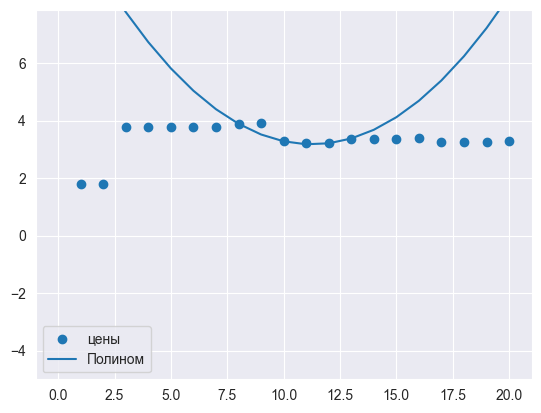

In [830]:
x_new = np.arange(0, 21, 1)
plt.scatter(df["day"], df["price"], label='цены')
plt.plot(x_new, Polynomial(polynom_price3.coef[::-1])(x_new), label='Полином')
plt.ylim(top=df["price"].max() * 2, bottom=-5)
plt.legend()
plt.show()

График для количества продаж при выборке из 3 дней

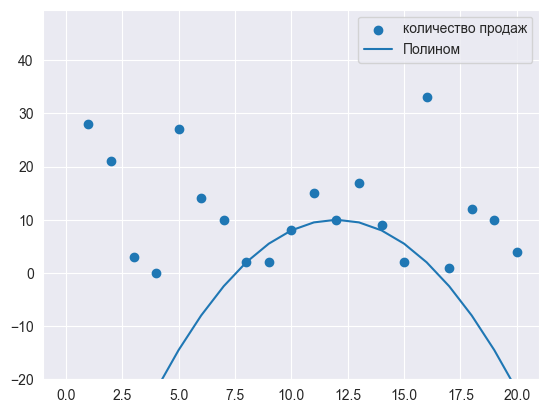

In [831]:
x_new = np.arange(0, 21, 1)
plt.scatter(df["day"], df["amount"], label='количество продаж')
plt.plot(x_new, Polynomial(polynom_amount3.coef[::-1])(x_new), label='Полином')
plt.ylim(top=df["amount"].max() * 1.5, bottom=-20)
plt.legend()
plt.show()

График для цен при выборке из 5 дней

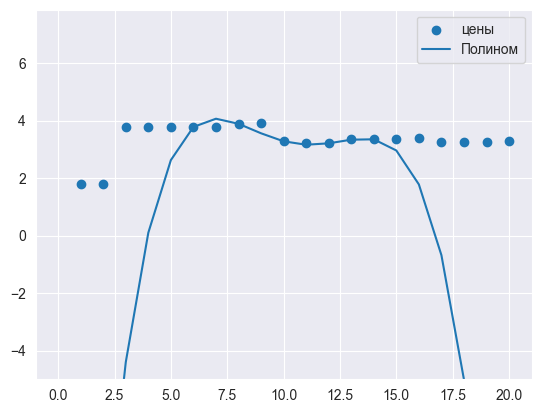

In [832]:
x_new = np.arange(0, 21, 1)
plt.scatter(df["day"], df["price"], label='цены')
plt.plot(x_new, Polynomial(polynom_price5.coef[::-1])(x_new), label='Полином')
plt.ylim(top=df["price"].max() * 2, bottom=-5)
plt.legend()
plt.show()

График для количества продаж при выборке из 5 дней

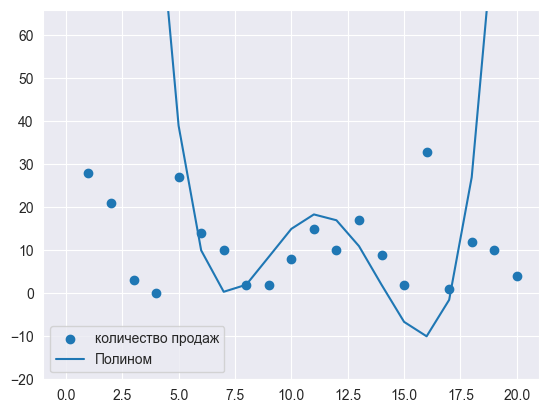

In [833]:
x_new = np.arange(0, 21, 1)
plt.scatter(df["day"], df["amount"], label='количество продаж')
plt.plot(x_new, Polynomial(polynom_amount5.coef[::-1])(x_new), label='Полином')
plt.ylim(top=df["amount"].max() * 2, bottom=-20)
plt.legend()
plt.show()

### Интерполяционный многочлен Ньютона для неравноотстоящих узлов
Предположим, что значение числа продаж и цены для 5-го и 15-го дней пропущены.
Необходимо определить его значение с использованием многочлена Ньютона для не равноотстоящих
узлов. Используйте для этого два предыдущих и одно последующее значение (то есть значения 3,4,6 и 13,14,16) для цен количества продаж

##### пример для трёх точек
$L = y_0 + [x_0. x_1](x-x_0)+[x_0. x_1. x_1](x-x_0)(x-x_1)$

Построим таблицу разделённых разностей

Необходимо построить 4 таблицы разделённых разностей.
Каждая таблица для трёх точек. Первые две таблицы для цены и количества продаж 3,4 и 6 дней,
а две другие для цены и количества продаж 13, 14 и 16 дней
Затем для каждой таблицы необходимо найти полином, подставить в него искомый день (точку) и вычислить
x - дни
y - цена/количество продаж

Таблица цены на 3,4 и 6 дни

In [834]:
name = "price"
sep_dif_price5 = pd.DataFrame({"x": [3, 4, 6],
                               "y": [df[name][2], df[name][3], df[name][5]]})
sep_dif_price5["first"] = [
    (sep_dif_price5["y"][1] - sep_dif_price5["y"][0]) / (sep_dif_price5["x"][1] - sep_dif_price5["x"][0]),
    (sep_dif_price5["y"][2] - sep_dif_price5["y"][1]) / (sep_dif_price5["x"][2] - sep_dif_price5["x"][1]),
    None]
sep_dif_price5["second"] = [
    (sep_dif_price5["first"][1] - sep_dif_price5["first"][0]) / (sep_dif_price5["x"][2] - sep_dif_price5["x"][0]),
    None,
    None]
sep_dif_price5

,x,y,first,second
0,3,3.78,0.0,0.0
1,4,3.78,0.0,NaN
2,6,3.78,NaN,NaN


Найдём полином

In [835]:
print(
    f"P_3 = {sep_dif_price5['y'][0]}+{sep_dif_price5['first'][0]}*(x-{sep_dif_price5['x'][0]}) + {sep_dif_price5['second'][0]}*(x-{sep_dif_price5['x'][0]})*(x-{sep_dif_price5['x'][1]})")

P_3 = 3.78+0.0*(x-3) + 0.0*(x-3)*(x-4)


Подставим значения нужного дня

In [836]:
day = 5
print(
    f"P_3 = {sep_dif_price5['y'][0]}+{sep_dif_price5['first'][0]}*({day}-{sep_dif_price5['x'][0]}) + {sep_dif_price5['second'][0]}*({day}-{sep_dif_price5['x'][0]})*({day}-{sep_dif_price5['x'][1]})")

P_3 = 3.78+0.0*(5-3) + 0.0*(5-3)*(5-4)


И вычислим

In [837]:
day = 5
newton_price_5 = sep_dif_price5["y"][0] + sep_dif_price5["first"][0] * (day - sep_dif_price5["x"][0]) + \
                 sep_dif_price5["second"][
                     0] * (day - sep_dif_price5["x"][0]) * (day - sep_dif_price5["x"][1])
newton_price_5

3.78

Cравним с реальными данными

In [838]:
df["price"][4]

3.78

В данном случае полностью совпала, но это совпадение, так как все 4 значения цен одинаковые

Таблица количества продаж на 3,4 и 6 дни

In [839]:
name = "amount"
sep_dif_amount5 = pd.DataFrame({"x": [3, 4, 6],
                                "y": [df[name][2], df[name][3], df[name][5]]})
sep_dif_amount5["first"] = [
    (sep_dif_amount5["y"][1] - sep_dif_amount5["y"][0]) / (sep_dif_amount5["x"][1] - sep_dif_amount5["x"][0]),
    (sep_dif_amount5["y"][2] - sep_dif_amount5["y"][1]) / (sep_dif_amount5["x"][2] - sep_dif_amount5["x"][1]),
    None]
sep_dif_amount5["second"] = [
    (sep_dif_amount5["first"][1] - sep_dif_amount5["first"][0]) / (sep_dif_amount5["x"][2] - sep_dif_amount5["x"][0]),
    None,
    None]
sep_dif_amount5

,x,y,first,second
0,3,3,-3.0,3.333333
1,4,0,7.0,NaN
2,6,14,NaN,NaN


Найдём полином

In [840]:
print(
    f"P_3 = {sep_dif_amount5['y'][0]}+{sep_dif_amount5['first'][0]}*(x-{sep_dif_amount5['x'][0]}) + {sep_dif_amount5['second'][0]}*(x-{sep_dif_amount5['x'][0]})*(x-{sep_dif_amount5['x'][1]})")

P_3 = 3+-3.0*(x-3) + 3.3333333333333335*(x-3)*(x-4)


Подставим значения нужного дня

In [841]:
day = 5
print(
    f"P_3 = {sep_dif_amount5['y'][0]}+{sep_dif_amount5['first'][0]}*({day}-{sep_dif_amount5['x'][0]}) + {sep_dif_amount5['second'][0]}*({day}-{sep_dif_amount5['x'][0]})*({day}-{sep_dif_amount5['x'][1]})")

P_3 = 3+-3.0*(5-3) + 3.3333333333333335*(5-3)*(5-4)


И вычислим

In [842]:
day = 5
newton_amount_5 = sep_dif_amount5["y"][0] + sep_dif_amount5["first"][0] * (day - sep_dif_amount5["x"][0]) + \
                  sep_dif_amount5["second"][0] * (day - sep_dif_amount5["x"][0]) * (day - sep_dif_amount5["x"][1])
newton_amount_5

3.666666666666667

Cравним с реальными данными

In [843]:
df["amount"][4]

27

В данном случае значения значительно значительнол отличаются. Скорее всего, опять же, из-за большей разницы между значениями обучающей выборки

Таблица цен на 13,14 и 16 дни

In [844]:
name = "price"
sep_dif_price15 = pd.DataFrame({"x": [13, 14, 16],
                                "y": [df[name][12], df[name][13], df[name][15]]})
sep_dif_price15["first"] = [
    (sep_dif_price15["y"][1] - sep_dif_price15["y"][0]) / (sep_dif_price15["x"][1] - sep_dif_price15["x"][0]),
    (sep_dif_price15["y"][2] - sep_dif_price15["y"][1]) / (sep_dif_price15["x"][2] - sep_dif_price15["x"][1]),
    None]
sep_dif_price15["second"] = [
    (sep_dif_price15["first"][1] - sep_dif_price15["first"][0]) / (sep_dif_price15["x"][2] - sep_dif_price15["x"][0]),
    None,
    None]
sep_dif_price15

,x,y,first,second
0,13,3.35,0.000,0.008333
1,14,3.35,0.025,NaN
2,16,3.40,NaN,NaN


In [845]:
print(
    f"P_3 = {sep_dif_price15['y'][0]}+{sep_dif_price15['first'][0]}*(x-{sep_dif_price15['x'][0]}) + {sep_dif_price15['second'][0]}*(x-{sep_dif_price15['x'][0]})*(x-{sep_dif_price15['x'][1]})")

P_3 = 3.35+0.0*(x-13) + 0.008333333333333304*(x-13)*(x-14)


Подставим значения нужного дня

In [846]:
day = 15
print(
    f"P_3 = {sep_dif_price15['y'][0]}+{sep_dif_price15['first'][0]}*({day}-{sep_dif_price15['x'][0]}) + {sep_dif_price15['second'][0]}*({day}-{sep_dif_price15['x'][0]})*({day}-{sep_dif_price15['x'][1]})")

P_3 = 3.35+0.0*(15-13) + 0.008333333333333304*(15-13)*(15-14)


И вычислим

In [847]:
day = 15
newton_price_15 = sep_dif_price15["y"][0] + sep_dif_price15["first"][0] * (day - sep_dif_price15["x"][0]) + \
                  sep_dif_price15["second"][0] * (day - sep_dif_price15["x"][0]) * (day - sep_dif_price15["x"][1])
newton_price_15

3.3666666666666667

Cравним с реальными данными

In [848]:
df["price"][14]

3.37

В данном значения опять очень похожи, но скорее всего это опять вызвано маленьким различием между всеми ценами

Таблица количества продаж на 13,14 и 16 дни

In [849]:
name = "amount"
sep_dif_amount15 = pd.DataFrame({"x": [13, 14, 16],
                                 "y": [df[name][12], df[name][13], df[name][15]]})
sep_dif_amount15["first"] = [
    (sep_dif_amount15["y"][1] - sep_dif_amount15["y"][0]) / (sep_dif_amount15["x"][1] - sep_dif_amount15["x"][0]),
    (sep_dif_amount15["y"][2] - sep_dif_amount15["y"][1]) / (sep_dif_amount15["x"][2] - sep_dif_amount15["x"][1]),
    None]
sep_dif_amount15["second"] = [
    (sep_dif_amount15["first"][1] - sep_dif_amount15["first"][0]) / (
            sep_dif_amount15["x"][2] - sep_dif_amount15["x"][0]),
    None,
    None]
sep_dif_amount15

,x,y,first,second
0,13,17,-8.0,6.666667
1,14,9,12.0,NaN
2,16,33,NaN,NaN


In [850]:
print(
    f"P_3 = {sep_dif_amount15['y'][0]}+{sep_dif_amount15['first'][0]}*(x-{sep_dif_amount15['x'][0]}) + {sep_dif_amount15['second'][0]}*(x-{sep_dif_amount15['x'][0]})*(x-{sep_dif_price15['x'][1]})")

P_3 = 17+-8.0*(x-13) + 6.666666666666667*(x-13)*(x-14)


Подставим значения нужного дня

In [851]:
day = 15
print(
    f"P_3 = {sep_dif_amount15['y'][0]}+{sep_dif_amount15['first'][0]}*({day}-{sep_dif_amount15['x'][0]}) + {sep_dif_amount15['second'][0]}*({day}-{sep_dif_amount15['x'][0]})*({day}-{sep_dif_amount15['x'][1]})")

P_3 = 17+-8.0*(15-13) + 6.666666666666667*(15-13)*(15-14)


И вычислим

In [852]:
day = 15
newton_amount_15 = sep_dif_amount15["y"][0] + sep_dif_amount15["first"][0] * (day - sep_dif_amount15["x"][0]) + \
                   sep_dif_amount15["second"][0] * (day - sep_dif_amount15["x"][0]) * (day - sep_dif_amount15["x"][1])
newton_amount_15

14.333333333333334

Cравним с реальными данными

In [853]:
df["amount"][14]

2

В данном значения опять сильно различаются, Скорее всего причина всё также в большей разнице между значениями обучающей выборки

### 4) выводы о возможности заполнения пропущенных значений
На основе значения суммарной ошибки сделайте выводы о возможности заполнения пропущенных значений
средним (математическое ожидание), значением медианы, моды (любой одной если их несколько), средним
значением на основе предыдущего и последующих значений и значением, полученным по интерполяционной формуле
Ньютона для не равноотстоящих узлов. Для выполнения этой операции предположите, что значения, соответствующие
дням 5 и 15 в ваших данных пропущены.

Для начала вычислим всё это для цен

In [854]:
result_price = pd.DataFrame(
    {"day": [5], "price": [df['price'][4]], "mean": [df['price'].mean()], "median": [df["price"].median()],
     "mode": [df['price'].mode()[0]], "mean_next_prev": [(df['price'].iloc[3] + df['price'].iloc[5]) / 2],
     "newton": [newton_price_5]})
result_price.loc[len(result_price.index)] = [15, df['price'][14], df['price'].mean(), df["price"].median(),
                                             df['price'].mode()[0], (df['price'].iloc[13] + df['price'].iloc[15]) / 2,
                                             newton_price_15]
result_price.loc[len(result_price.index)] = ["total error",
                                             abs(result_price["price"][0] - result_price["price"][0]) + abs(
                                                 result_price["price"][1] - result_price["price"][1]),
                                             abs(result_price["price"][0] - result_price["mean"][0]) + abs(
                                                 result_price["price"][1] - result_price["mean"][1]),
                                             abs(result_price["price"][0] - result_price["median"][0]) + abs(
                                                 result_price["price"][1] - result_price["median"][1]),
                                             abs(result_price["price"][0] - result_price["mode"][0]) + abs(
                                                 result_price["price"][1] - result_price["mode"][1]),
                                             abs(result_price["price"][0] - result_price["mean_next_prev"][0]) + abs(
                                                 result_price["price"][1] - result_price["mean_next_prev"][1]),
                                             abs(result_price["price"][0] - result_price["newton"][0]) + abs(
                                                 result_price["price"][1] - result_price["newton"][1])]
result_price

,day,price,mean,median,mode,mean_next_prev,newton
0,5.0,3.78,3.3285,3.35,3.78,3.780,3.780000
1,15.0,3.37,3.3285,3.35,3.78,3.375,3.366667
2,total error,0.00,0.4930,0.45,0.41,0.005,0.003333


#### Вывод по датафрейму цен.
Если ориентироваться на значение суммарной ошибки, то наилучшим для заполнения пропущенных значений следует признать вариант
с интерполяционным многочленом ньютона и среднему значению вычисляемому на основе предыдущего и последующих значений.
Худшим же вариантом в данном случае будет среднее (математическое ожидание).


Теперь то же самое вычислим для количества продаж

In [855]:
result_amount = pd.DataFrame(
    {"day": [5], "amount": [df['amount'][4]], "mean": [df['amount'].mean()], "median": [df["amount"].median()],
     "mode": [df['amount'].mode()[0]], "mean_next_prev": [(df['amount'].iloc[3] + df['amount'].iloc[5]) / 2],
     "newton": [newton_amount_5]})
result_amount.loc[len(result_amount.index)] = [15, df['amount'][14], df['amount'].mean(), df["amount"].median(),
                                               df['amount'].mode()[0],
                                               (df['amount'].iloc[13] + df['amount'].iloc[15]) / 2, newton_amount_15]
result_amount.loc[len(result_amount.index)] = ["total error",
                                               abs(result_amount["amount"][0] - result_amount["amount"][0]) + abs(
                                                   result_amount["amount"][1] - result_amount["amount"][1]),
                                               abs(result_amount["amount"][0] - result_amount["mean"][0]) + abs(
                                                   result_amount["amount"][1] - result_amount["mean"][1]),
                                               abs(result_amount["amount"][0] - result_amount["median"][0]) + abs(
                                                   result_amount["amount"][1] - result_amount["median"][1]),
                                               abs(result_amount["amount"][0] - result_amount["mode"][0]) + abs(
                                                   result_amount["amount"][1] - result_amount["mode"][1]),
                                               abs(result_amount["amount"][0] - result_amount["mean_next_prev"][
                                                   0]) + abs(
                                                   result_amount["amount"][1] - result_amount["mean_next_prev"][1]),
                                               abs(result_amount["amount"][0] - result_amount["newton"][0]) + abs(
                                                   result_amount["amount"][1] - result_amount["newton"][1])]
result_amount

,day,amount,mean,median,mode,mean_next_prev,newton
0,5.0,27.0,11.4,10.0,2.0,7.0,3.666667
1,15.0,2.0,11.4,10.0,2.0,21.0,14.333333
2,total error,0.0,25.0,25.0,25.0,39.0,35.666667


#### Вывод по датафрейму количества продаж.
Если ориентироваться на значение суммарной ошибки, то в данном случае, наоборот, наилучшим для заполнения пропущенных значений следует признать среднее, медиану и моду,
Тогда как худшими оказались интерполяционный многочлен ньютона и среднее значению, вычисляемое на основе предыдущего и последующих значений.

В результате можно сделать обобщающий вывод, что ни один из способов не гарантирует точного предсказания значений
и на некоторых данных даже "простое" среднее может оказаться точнее "сложного" интерполяционного многочлена Ньютона